  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

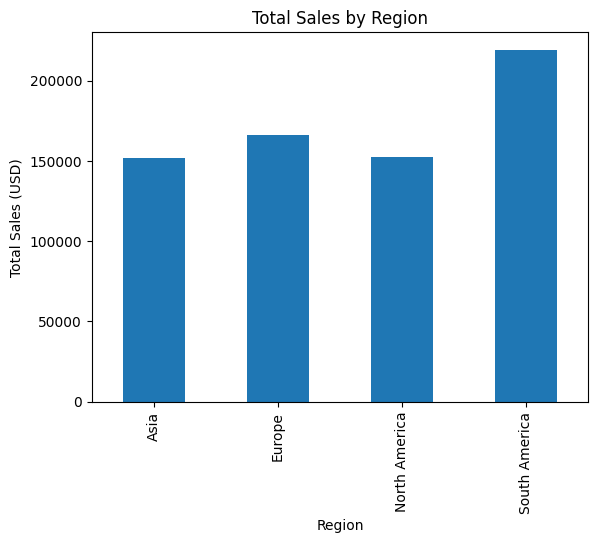

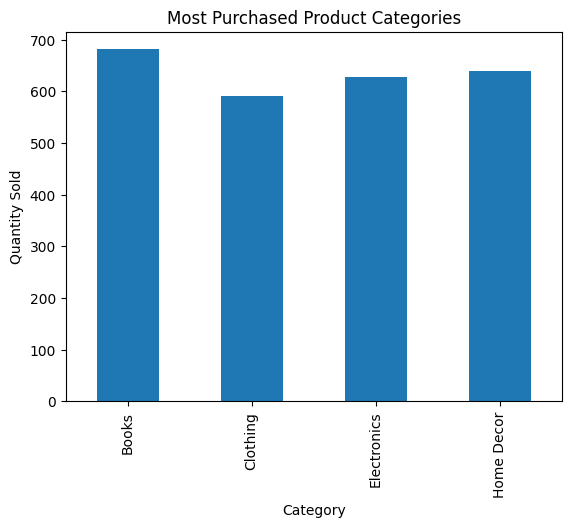

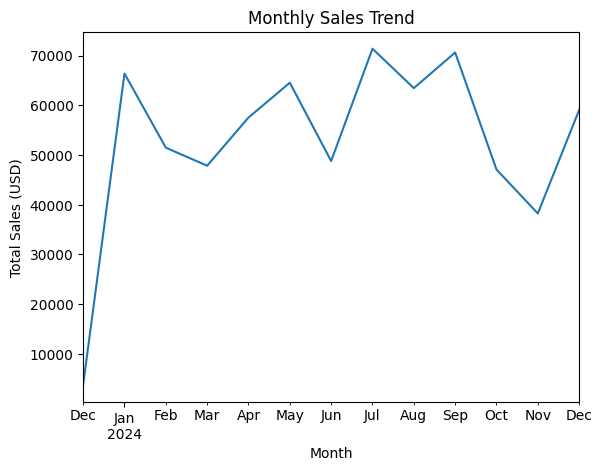

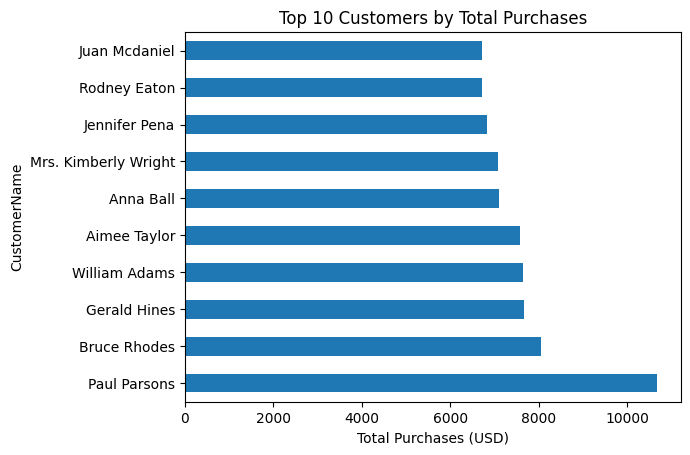

ValueError: could not convert string to float: 'T00001'

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the datasets
customers = pd.read_csv(r'D:\programming\programming\python\age&genderdetection\dataintern zepto\Customers.csv')
products = pd.read_csv(r'D:\programming\programming\python\age&genderdetection\dataintern zepto\Products.csv')
transactions = pd.read_csv(r'D:\programming\programming\python\age&genderdetection\dataintern zepto\Transactions.csv')

# Preview datasets
print(customers.head())
print(products.head())
print(transactions.head())

# Merging datasets for comprehensive analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# Data Cleaning
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])

# Basic statistics
print(merged_data.describe())
print(merged_data.info())

# EDA and Visualizations
# 1. Distribution of transactions by region
region_sales = merged_data.groupby('Region')['TotalValue'].sum()
region_sales.plot(kind='bar', title='Total Sales by Region', ylabel='Total Sales (USD)')
plt.show()

# 2. Most purchased product categories
category_sales = merged_data.groupby('Category')['Quantity'].sum()
category_sales.plot(kind='bar', title='Most Purchased Product Categories', ylabel='Quantity Sold')
plt.show()

# 3. Time-based analysis: Monthly sales trend
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend', ylabel='Total Sales (USD)')
plt.show()

# 4. Top 10 customers by total purchases
top_customers = merged_data.groupby('CustomerName')['TotalValue'].sum().nlargest(10)
top_customers.plot(kind='barh', title='Top 10 Customers by Total Purchases', xlabel='Total Purchases (USD)')
plt.show()

# Select only numeric columns for correlation
numeric_data = merged_data.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

